In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
data = pd.read_csv("CC GENERAL.csv", index_col = 0)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [6]:
np.sum(data.isnull())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Baris yang memiliki nilai null dihilangkan

In [7]:
data.dropna(inplace=True)

print(data.shape)

(8636, 17)


In [8]:
np.sum(data.isnull())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

###  Praproses

In [10]:
minmax_form = preprocessing.MinMaxScaler(feature_range = (0,1))
normalized_data = minmax_form.fit_transform(data)

normalized_data

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

### Latih Algoritma K-Means

#### Data sebelum dinormalisasi

In [11]:
sum_of_squared_distances = {}
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    model = KMeans(n_clusters = n_cluster,
                  init = 'random',
                  n_init = 10,
                  random_state = 0)
    
    # proses training
    model.fit(data)
    
    sum_of_squared_distances[n_cluster] = model.inertia_

In [12]:
sum_of_squared_distances

{1: 386445462723.7148,
 2: 274952052399.7312,
 3: 229270565677.2305,
 4: 203037006736.5297,
 5: 178858120702.04102,
 6: 160479213910.39963,
 7: 142105199578.89822,
 8: 130086760745.17253,
 9: 121698604106.16554,
 10: 114149164021.81198}

#### Elbow Method Chart

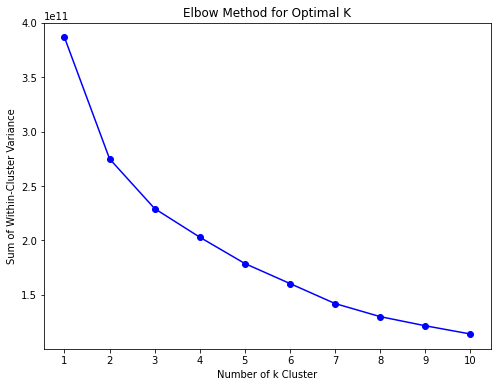

In [14]:
plt.figure(figsize = (8,6))

plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of k Cluster")
plt.ylabel("Sum of Within-Cluster Variance")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sum_of_squared_distances.values(),
        '-o', color = "Blue")

plt.show()

####  Data setelah dinormalisasi

In [15]:
sum_of_squared_distances = {}
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    model = KMeans(n_clusters = n_cluster,
                  init = 'random',
                  n_init = 10,
                  random_state = 0)
    
    # proses training
    model.fit(normalized_data)
    
    sum_of_squared_distances[n_cluster] = model.inertia_

In [16]:
sum_of_squared_distances

{1: 5638.904080164896,
 2: 3300.715647285973,
 3: 2739.0112859066435,
 4: 2423.2314103369936,
 5: 2145.404396632089,
 6: 1943.9906428216336,
 7: 1755.1173069469178,
 8: 1600.7128041405228,
 9: 1472.0997563400113,
 10: 1358.6661546055525}

#### Chart

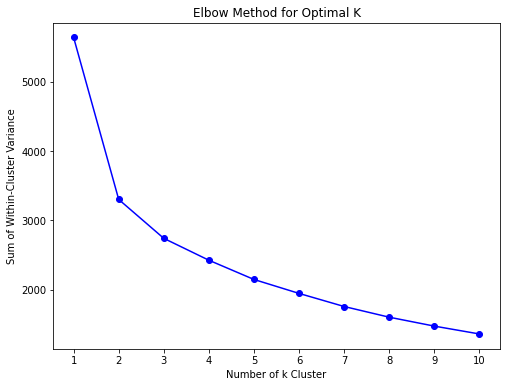

In [17]:
plt.figure(figsize = (8,6))

plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of k Cluster")
plt.ylabel("Sum of Within-Cluster Variance")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sum_of_squared_distances.values(),
        '-o', color = "Blue")

plt.show()

### Evaluasi dengan Silhouette Score

#### Data sesudah dinormalisasi

In [18]:
sil = {}
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters = n_cluster,
                      init = 'random',
                      n_init = 10,
                      random_state = 0)
    
    preds = clusterer.fit_predict(normalized_data)
    score = silhouette_score(data, preds, metric = "euclidean")
    
    sil[n_cluster] = score

In [19]:
for n_cluster, sil_score in sil.items():
    print(n_cluster, ":", sil_score)

2 : 0.05095022016250791
3 : -0.006860376378789921
4 : -0.05835054063243913
5 : -0.0950360033727049
6 : -0.10843961975488724
7 : -0.12227101252104713
8 : -0.11531799206805146
9 : -0.12978291502715672
10 : -0.1274512699551232


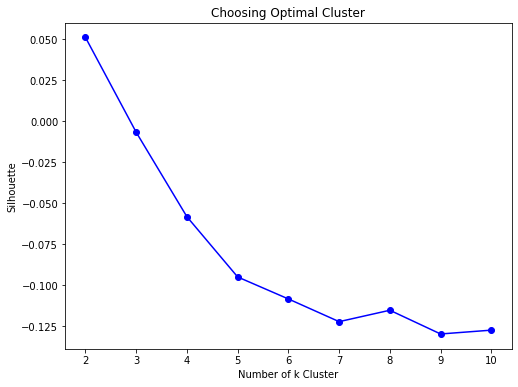

In [20]:
plt.figure(figsize = (8,6))

plt.title("Choosing Optimal Cluster")
plt.xlabel("Number of k Cluster")
plt.ylabel("Silhouette")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sil.values(),
        '-o', color = "Blue")

plt.show()

#### Data yang belum dinormalisasi

In [21]:
sil = {}
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters = n_cluster,
                      init = 'random',
                      n_init = 10,
                      random_state = 0)
    
    preds = clusterer.fit_predict(data)
    score = silhouette_score(data, preds, metric = "euclidean")
    
    sil[n_cluster] = score

In [22]:
for n_cluster, sil_score in sil.items():
    print(n_cluster, ":", sil_score)

2 : 0.511103597508838
3 : 0.46119462223882884
4 : 0.4615945845321659
5 : 0.3766112036214361
6 : 0.39027779713459776
7 : 0.3692089751890247
8 : 0.38516420877580954
9 : 0.3523457456423614
10 : 0.35951073856134425


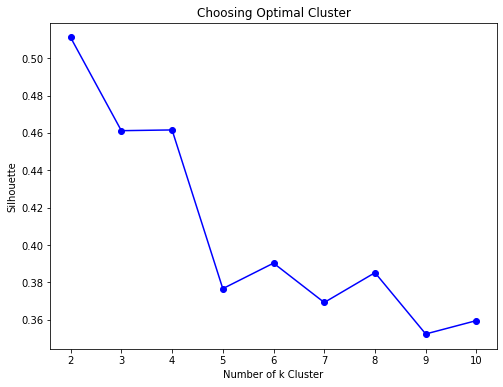

In [23]:
plt.figure(figsize = (8,6))

plt.title("Choosing Optimal Cluster")
plt.xlabel("Number of k Cluster")
plt.ylabel("Silhouette")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sil.values(),
        '-o', color = "Blue")

plt.show()

### Proses akhir

In [24]:
kmins = KMeans(n_clusters = 2, 
              init = 'random',
              n_init = 10,
              random_state = 0)

kmins.fit(data)
y_kmins = kmins.predict(data)

In [26]:
kmins_df = pd.DataFrame(y_kmins, columns = ['cluster'])
kmins_df

,cluster
0,0
1,1
2,0
3,0
4,0
...,...
8631,0
8632,0
8633,0
8634,0


In [28]:
data['segmen'] = y_kmins
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,segmen
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0


<AxesSubplot:>

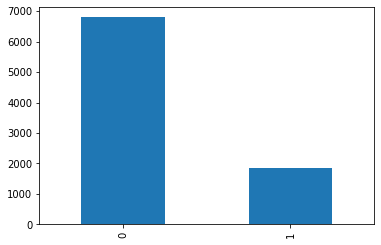

In [29]:
data['segmen'].value_counts().plot(kind = 'bar')